<a href="https://colab.research.google.com/github/MuhsinaPP/MachineLearning/blob/master/weather_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Loading Dataset**

In [10]:
data=pd.read_csv("/content/drive/MyDrive/Dataset/weather_data.csv")

**Studying data**

In [11]:
data.isnull().any()

,0
Outlook,False
Temperature,False
Humidity,False
Wind,False
Play,False


In [4]:
data.head()

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Cool,Normal,Weak,Yes
4,Rain,Cool,Normal,Strong,No


In [5]:
data.tail()

,Outlook,Temperature,Humidity,Wind,Play
9,Overcast,Mild,High,Strong,Yes
10,Overcast,Hot,Normal,Weak,Yes
11,Rain,Mild,High,Strong,No
12,Overcast,Cool,Normal,Strong,Yes
13,Rain,Mild,High,Weak,Yes


In [6]:
data.shape

(14, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   Play         14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [8]:
data.describe()

,Outlook,Temperature,Humidity,Wind,Play
count,14,14,14,14,14
unique,3,3,2,2,2
top,Sunny,Mild,High,Weak,Yes
freq,5,6,7,8,9


**LabelEncoder**

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
label=LabelEncoder()

In [14]:
newOutlook=label.fit_transform(data['Outlook'])
newTemperature=label.fit_transform(data['Temperature'])
newHumidity=label.fit_transform(data['Humidity'])
newWind=label.fit_transform(data['Wind'])
newPlay=label.fit_transform(data['Play'])

In [15]:
data['Outlook']=newOutlook
data['Temperature']=newTemperature
data['Humidity']=newHumidity
data['Wind']=newWind
data['Play']=newPlay

In [16]:
data

,Outlook,Temperature,Humidity,Wind,Play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,0,1,1,1
4,1,0,1,0,0
5,2,2,0,1,0
6,2,0,1,1,1
7,1,2,1,1,1
8,2,2,1,0,1
9,0,2,0,0,1


**X and y matrix**

In [17]:
x=data[['Outlook','Temperature','Humidity','Wind']]
y=data['Play']

**Splitting into train and test datasets**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=1)

**DecisionTreeClassifier Model**

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
model=DecisionTreeClassifier()

In [22]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [23]:
model.score(xtest,ytest)

0.3333333333333333

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model1=LogisticRegression()

In [26]:
model1.fit(xtrain,ytrain)

LogisticRegression()

In [27]:
model1.score(xtest,ytest)

0.6666666666666666

In [28]:
y_act=ytest
y_pred=model.predict(xtest)

In [29]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_act,y_pred)

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

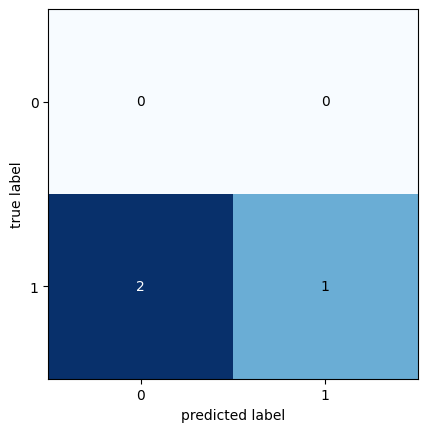

In [30]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(cf)

In [31]:
from sklearn.metrics import classification_report
report = classification_report(y_act, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.33      0.50         3

    accuracy                           0.33         3
   macro avg       0.50      0.17      0.25         3
weighted avg       1.00      0.33      0.50         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
